## Task 4 - Clustering

Use PCA to reduce the dimensionality of the data to 2. You should use the dataset obtained after pre-processing and transformation from Task 3.1 without feature selection. Write a Python program to visualize the results of clustering the PCA-reduced dataset.

Markdown Question: How do you think the visualization will change if you used 3 PCA components?

<span style="font-weight:bold;">Save your response (program and markdown) as task4.ipynb.</span>

## <b style="color: blue;">A visualization should have a goal/question/hypothesis. Clarify this!</b>

In [1]:
# ---- REMOVE REDUNDANT FEATURES
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from functions.pre_processing import *
from functions.transformations import *
from functions.feature_selection import *
from functions.analysis import *
from functions.model import *
from functions.classifiers import *
from functions.evaluation import *
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning
# A visualization should have a goal/question/hypothesis. Clarify this!

(16200, 512)
(5400, 512)
(16200,)
(5400,)


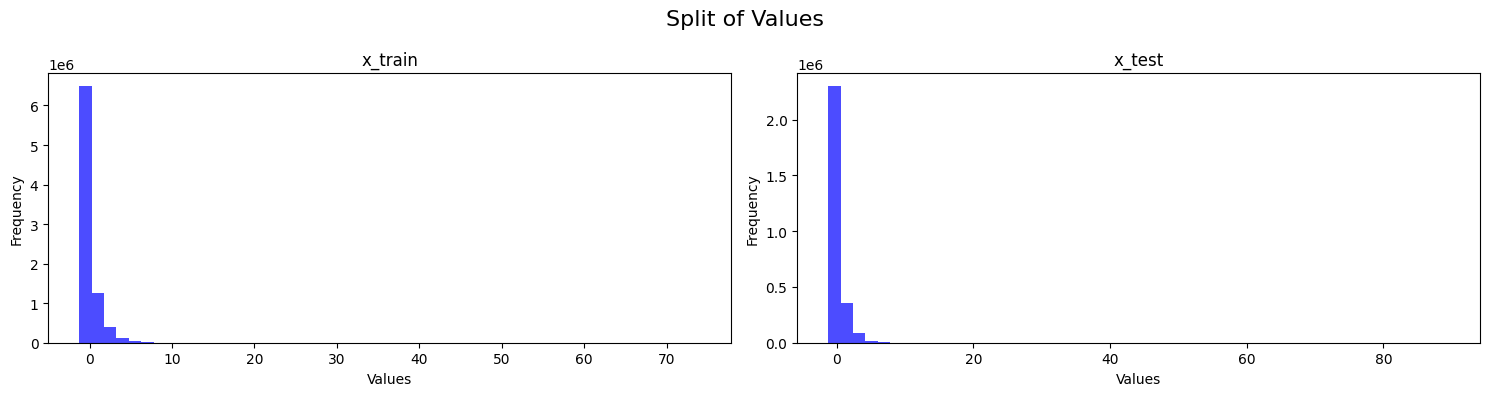

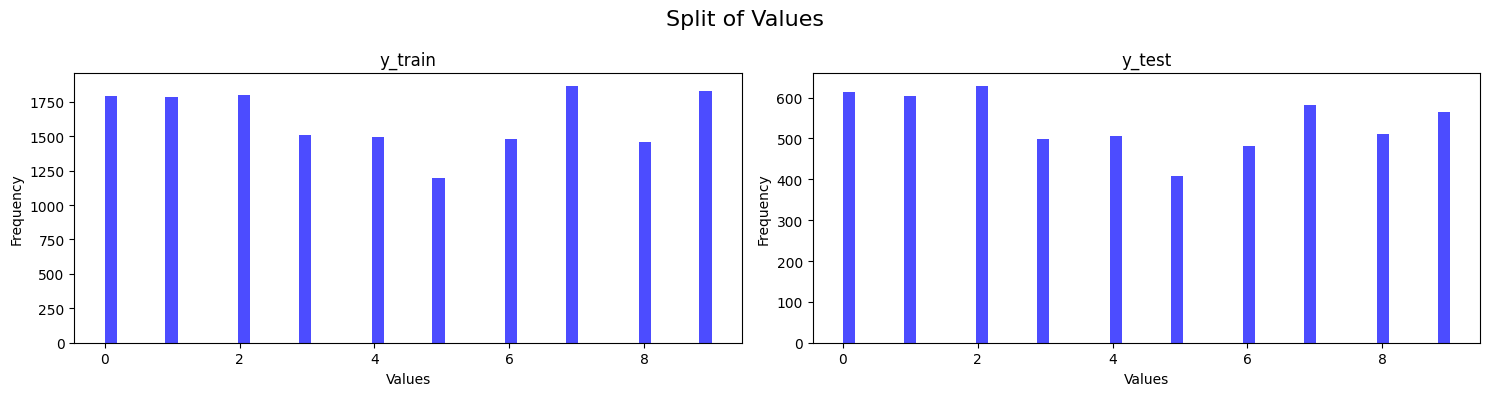

In [25]:
x_train_norm = load_model("datasets/saved_datasets/task1/x_train")
x_test_norm = load_model("datasets/saved_datasets/task1/x_test")
y_train_norm = load_model("datasets/saved_datasets/task1/y_train")
y_test_norm = load_model("datasets/saved_datasets/task1/y_test")

print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

plot_class_split_of_values([x_train_norm, x_test_norm], ["x_train", "x_test"])
plot_class_split_of_values([y_train_norm, y_test_norm], ["y_train", "y_test"])

# x_train, x_test, y_train, y_test = fetch_datasets()
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# x_train_norm, x_test_norm = standardize_std_scaler(x_train, x_test)

----
## Dimensionality Reduction 

It is used to reduce the amount of features
PCA is a dimensionality reduction technique (reducing data whilst keeping as much info as possible - mainly removes cols). 

How does dimensionality reduction differ from feature selection? -> Feature selection fetches only the most relevant variables whereas in dimensionality reduction, a smaller set of new variables are taken, each being a combination of the input variables, containing basically the same information as the input variables 

<span style="color:red">
Things to do <h3>Check other dimensionality reduction methods</h3>

- PCA - Built to compress the data but will lose a lot in interoperability
</span>


In [26]:
x_train_pca, x_test_pca = reduce_pca_dimensionality(x_train_norm, x_test_norm, 2)

print(x_train_pca.shape)
print(x_test_pca.shape)

(16200, 2)
(5400, 2)


In [4]:
svc_results = svc_classifier(x_train_pca, x_test_pca, y_train_norm, y_test_norm)

------ Holdout Validation ------
Training Accuracy: 0.5743827160493827
Testing Accuracy: 0.5640740740740741
------ Cross Validation ------
Mean Accuracy: 0.5726543209876542
------ Stratified K fold Validation ------
Mean Accuracy: 0.5730246913580247
Std Deviation: 0.006527175788720818


----
## Clustering

In [27]:
km = KMeans(n_clusters=3, random_state=42)
clusters = km.fit_predict(x_train_pca)

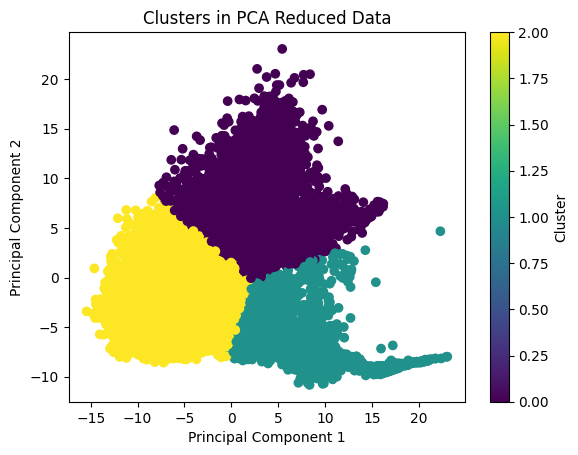

In [28]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters in PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

#### Finding the best K value

- 1st find the centroids -> elbow method with Sum of Squared Error (for each centroid in a cluster, calculate SSE and then add) -> plot line graph

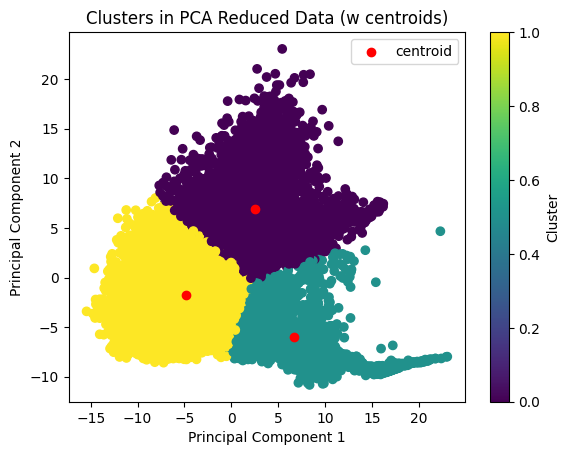

In [34]:

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="red", marker="o", label='centroid')
plt.title('Clusters in PCA Reduced Data (w centroids)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [36]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_train_pca)
    sse.append(km.inertia_)

print(sse)

[1167577.1992403513, 759441.155088529, 411525.0151193484, 307910.4214796834, 239934.5249639931, 201159.792499651, 182396.27086814697, 153228.6127417665, 132202.90499123812]


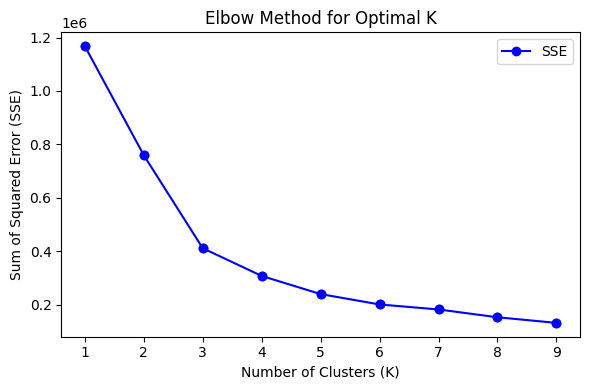

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b', label='SSE')
plt.scatter(k_range, sse, color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.xticks(k_range)
plt.legend()
plt.tight_layout()
plt.show()

It can be seen K=3 is the ideal value ......

----
## Evaluation <b style="color: blue;">Define metric used for evaluation</b>

In [1]:
## Use clustering metrics from sklearn

----
<span style="font-weight:bold;">Markdown Question: How do you think the visualization will change if you used 3 PCA components?

This is the answer